In [40]:
import torch
import numpy as np
from alexnet_model import AlexNet
from torchvision import utils
import matplotlib.pyplot as plt

In [41]:
def visualizeFilter(tensor, ch=0, allKernels=False, nrow=8, padding=1):
    n, c, h, w = tensor.shape

    if allKernels:
        tensor = tensor.view(n*c, -1, w, h)
    elif c != 3:
        tensor = tensor[:, ch, :, :].unsqueeze(dim=1)

    rows = np.min((tensor.shape[0]//nrow+1, 64))
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)

    plt.figure(figsize=(nrow, rows))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))


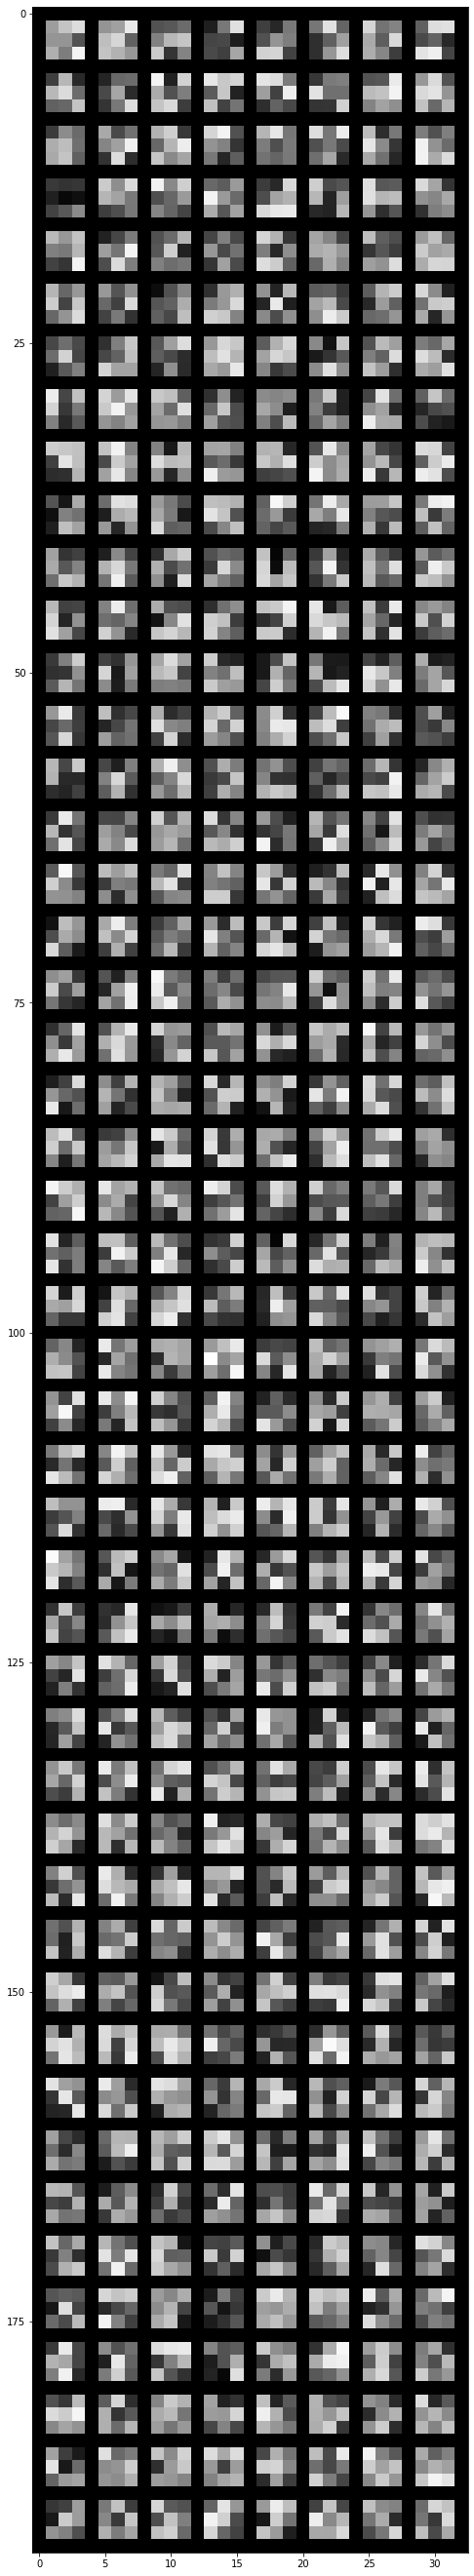

In [43]:
model = AlexNet(num_classes=10)
model.cpu()

model.load_state_dict(torch.load('save_model/AlexNet.pt'))
layer = 6
filter = model.features[layer].weight.data.clone()
visualizeFilter(filter)